
















# **Kaynak ve veri seti açıklaması**

Veri seti, Kaggle web sitesinden Massachusetts, Framingham kasabasında yaşayan bireyler üzerinde devam eden bir kardiyovasküler çalışmadan alınmıştır. Amaç hastanın 10 yıllık gelecekte koroner kalp hastalığı (KKH) riskinin olup olmadığını tahmin etmektir. 4239 gözlem birimi üzerinde 15 değişken için ölçümler yapılmıştır.

Demografik:
• Sex :Cinsiyet (erkek veya kadın)
• Age: Hastanın yaşı
• Current Smoker: Halen sigara içenler
• CigsPerDay: Günlük ortalama içilen sigara sayısı
Tıbbi öykü:
• BP Meds: hastanın tansiyon ilacı kullanıp kullanmadığı (Nominal)
• Prevalent Stroke: hastanın daha önce inme geçirip geçirmediği (Nominal)
• Prevalent Hyp: hastanın hipertansiyonu olup olmadığı (Nominal)
• Diyabet: hastanın diyabeti olup olmadığı (Nominal)
Mevcut medikal ölçümler:
• Tot Chol: toplam kolesterol düzeyi (Sürekli)
• Sys BP: sistolik kan basıncı (Sürekli)
• Dia BP: diyastolik kan basıncı (Sürekli)
• BMI: Vücut Kitle İndeksi (Sürekli)
• Kalp Atış Hızı: kalp hızı (Sürekli)
• Glikoz: glikoz düzeyi (Sürekli)
Tahmin değişkeni (istenen hedef)
•Ten Year CHD : 10 yıllık koroner kalp hastalığı riski KKH


# Kütüphanelerin Yüklenmesi

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# *Verinin yüklenmesi*





In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = io.BytesIO(uploaded['kardiyovaskuler.csv'])

Saving kardiyovaskuler.csv to kardiyovaskuler (1).csv


In [ ]:
df = pd.read_csv(data)

# Verinin incelenmesi ve işlenebilecek hale getirilmesi

In [ ]:
df.head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4238, 15)

In [ ]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

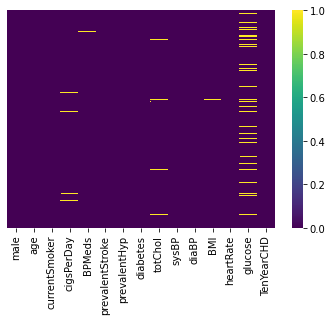

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cmap="viridis")

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


In [ ]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df["TenYearCHD"].value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

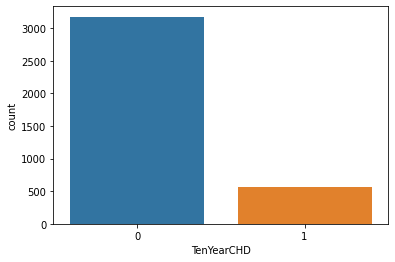

In [ ]:
sns.countplot(x="TenYearCHD", data=df);


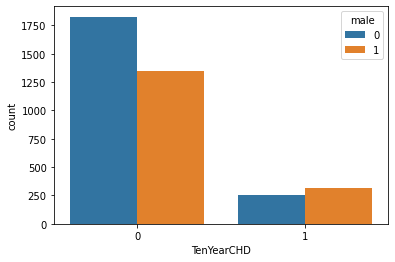

In [ ]:
sns.countplot(x="TenYearCHD",hue="male", data=df);

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,3749.0,0.445185,0.497053,0.00,0.00,0.00,1.00,1.0
age,3749.0,49.578821,8.569322,32.00,42.00,49.00,56.00,70.0
currentSmoker,3749.0,0.488397,0.499932,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3749.0,9.005335,11.922440,0.00,0.00,0.00,20.00,70.0
BPMeds,3749.0,0.030408,0.171730,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3749.0,0.005601,0.074643,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3749.0,0.311816,0.463297,0.00,0.00,0.00,1.00,1.0
diabetes,3749.0,0.027207,0.162709,0.00,0.00,0.00,0.00,1.0
totChol,3749.0,236.952787,44.610417,113.00,206.00,234.00,264.00,696.0
sysBP,3749.0,132.365964,22.051951,83.50,117.00,128.00,144.00,295.0


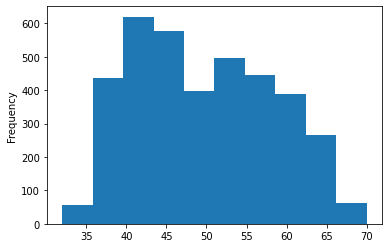

In [ ]:
df["age"].plot.hist();

In [ ]:
df.groupby('TenYearCHD')["age", "cigsPerDay", "totChol",	"sysBP",	"diaBP",	"BMI",	"heartRate",	"glucose"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,
0,48.737488,8.72175,235.260623,130.306106,82.178313,25.664271,75.588920,80.625748
1,54.251748,10.58042,246.351399,143.806818,87.129371,26.617115,76.342657,88.867133


# Model kurma

y çıktı ve X girdi değişkenlerini ayarlıyoruz.

In [ ]:
y = df["TenYearCHD"]
X = df.drop(["TenYearCHD"], axis=1)

veriyi 0.75 i eğitim, 0.25 i test olacak şekilde parçalıyoruz.

In [ ]:
X_train,X_test, y_train, y_test =train_test_split = train_test_split(X,y, test_size=0.25, random_state=100)

In [ ]:
lr = LogisticRegression(max_iter=1000)

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000)

### model için anlamlı değişkenlerin yorumlanması

In [ ]:
lr.score(X_test, y_test)

0.8464818763326226

In [ ]:
lr.score(X_train, y_train)

0.855567413731768

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
pre=lr.predict(X_test)
confusion_matrix(y_test,pre)

array([[781,   4],
       [140,  13]])